#Task 5: Customer Churn Prediction (Bank Customers)
1. Introduction
Problem Statement

The objective of this task is to predict whether a bank customer is likely to leave the bank (churn) based on their demographic and financial information. Customer churn prediction helps banks improve customer retention by identifying high-risk customers in advance.
This task uses an Artificial Neural Network (ANN) for binary classification.

#2. Dataset Description

Churn Modelling Dataset

Key Features:

CreditScore – Customer credit score

Geography – Country of the customer

Gender – Male or Female

Age – Customer age

Tenure – Years with the bank

Balance – Account balance

NumOfProducts – Number of bank products

HasCrCard – Credit card status

IsActiveMember – Activity status

EstimatedSalary – Estimated salary

Exited – Target variable (1 = Churned, 0 = Retained)



#3. Import Required Libraries

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

#4. Load the Dataset

In [2]:
# Load the churn dataset
df = pd.read_csv("/content/Churn_Modelling.csv")

#5. Dataset Inspection

In [3]:
# Check dataset structure
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#6. Data Cleaning & Preparation
##6.1 Remove Unnecessary Columns

In [4]:
# Drop columns that do not contribute to churn prediction
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

#6.2 Encode Categorical Variables

In [5]:
# Encode Gender column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-hot encode Geography column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

#7. Feature Selection

In [6]:
# Separate input features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

#8. Feature Scaling

In [7]:
# Scale numerical features for better ANN performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

#9. Train-Test Split

In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#10. Build ANN Model

In [9]:
# Initialize ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#11. Compile the Model

In [10]:
# Compile the ANN model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#12. Train the Model

In [11]:
# Train the ANN model
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4763 - loss: 0.7512 - val_accuracy: 0.8025 - val_loss: 0.4816
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4782 - val_accuracy: 0.8075 - val_loss: 0.4218
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4444 - val_accuracy: 0.8188 - val_loss: 0.3955
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8105 - loss: 0.4167 - val_accuracy: 0.8375 - val_loss: 0.3801
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8284 - loss: 0.4054 - val_accuracy: 0.8512 - val_loss: 0.3643
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.3721 - val_accuracy: 0.8575 - val_loss: 0.3548
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8466 - loss: 0.3745 - val_accuracy: 0.8662 - val_loss: 0.3459
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8544 - loss: 0.3552 - val_accuracy: 0.

#13. Model Prediction

In [12]:
# Predict churn probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities into binary values
y_pred = (y_pred_prob > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#14. Model Evaluation
##14.1 Accuracy Score

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.859

#14.2 Confusion Matrix

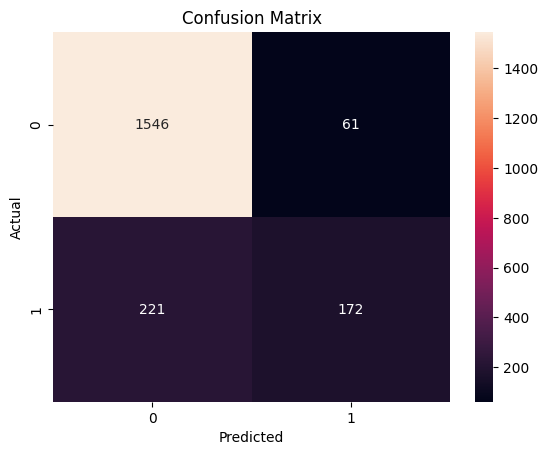

In [14]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#15. Feature Importance Analysis (Using Weights)

In [15]:
# Extract weights from the first hidden layer
weights = model.layers[0].get_weights()[0]

# Calculate average absolute weight per feature
importance = np.mean(np.abs(weights), axis=1)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': df.drop('Exited', axis=1).columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance.head()

,Feature,Importance
5,NumOfProducts,0.410987
2,Age,0.355422
7,IsActiveMember,0.325506
4,Balance,0.261944
10,Geography_Spain,0.256036
